In [ ]:
#Load your dataset
import pandas as pd
df = pd.read_csv("/content/sleep disorder synthetic data.csv")

print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)

Shape: (10000, 36)
Data Types:
 Client_ID                                                                             int64
Name                                                                                 object
Age                                                                                 float64
Gender                                                                               object
Height (in cm)                                                                      float64
Weight (in kg)                                                                      float64
chronic health conditions\n                                                          object
mental health conditions\n                                                           object
current medication                                                                   object
no of caffeine per day                                                                int64
smoke\n                                         

In [ ]:
rename_dict = {
    'Client_ID':'client_id',
    'Name': 'name',
    'Age': 'age',
    'Gender': 'gender',
    'Height (in cm)': 'height_cm',
    'Weight (in kg)': 'weight_kg',
    'chronic health conditions\n': 'chronic_conditions',
    'mental health conditions\n': 'mental_conditions',
    'current medication': 'medication',
    'no of caffeine per day': 'caffeine_per_day',
    'smoke\n': 'smoking_status',
    'no of  alcoholic drinks \n(in number)': 'alcoholic_drinks_per_week',
    'exercise duration\n': 'exercise_duration',
    ' screen time (in hrs):\n': 'screen_time_hrs',
    'diet quality\n': 'diet_quality',
    'sleep duration (in hours):\n': 'sleep_duration',
    'fall asleep (in minutes)': 'time_to_fall_asleep',
    'no of times wake up in night': 'night_awakenings',
    'weekdays bed time\n': 'weekday_bedtime',
    'weekdays wake up': 'weekday_wakeup',
    'weekends bed time': 'weekend_bedtime',
    'weekends wake up': 'weekend_wakeup',
    ' sleep quality\n': 'sleep_quality',
    'Noise level in your bedroom (1 = very quiet, 10 = very noisy):': 'bedroom_noise_level',
    'Light level in your bedroom at night (1 = very dark, 10 = very bright):\n': 'bedroom_light_level',
    'comfortable is your mattress and pillow? (1-5):\n': 'comfort_level',
    'Rate your daytime sleepiness (1 = not sleepy at all, 10 = extremely sleepy):': 'daytime_sleepiness',
    ' Do you have memory or concentration issues?\n': 'memory_issues',
    ' blood pressure range': 'blood_pressure',
    'What is your usual heart rate (beats per minute)\n': 'heart_rate',
    'average daily steps count\n': 'daily_steps',
    "Any other health conditions you'd like to mention? (optional)": 'other_health_conditions',
    'urge to move your legs before sleep?(1 = Never, 10 = Always)': 'urge_to_move_leg_score',
    ' fall asleep suddenly during daytime unintentionally': 'daytime_sleep_attacks',
    ' work in night shifts or have irregular work patterns': 'irregular_work_patterns',
    'Have you experienced sleepwalking, night terrors, or unusual behaviors in sleep?': 'unusual_behaviors'
}
df.rename(columns=rename_dict, inplace=True)


In [ ]:
df.to_csv('Renamed_sleep_dataset.csv', index=False)

print("Data Types:\n", df.dtypes)

Data Types:
 client_id                      int64
name                          object
age                          float64
gender                        object
height_cm                    float64
weight_kg                    float64
chronic_conditions            object
mental_conditions             object
medication                    object
caffeine_per_day               int64
smoking_status                object
alcoholic_drinks_per_week      int64
exercise_duration             object
screen_time_hrs                int64
diet_quality                  object
sleep_duration               float64
time_to_fall_asleep            int64
night_awakenings               int64
weekday_bedtime               object
weekday_wakeup                object
weekend_bedtime               object
weekend_wakeup                object
sleep_quality                 object
bedroom_noise_level            int64
bedroom_light_level            int64
comfort_level                  int64
daytime_sleepiness       

In [ ]:
columns_to_drop = [
    'client_id',
    'name',
    'medication',
    'daily_steps',
    'heart_rate',
    'other_health_conditions',
    'weekday_bedtime',
    'weekday_wakeup',
    'weekend_bedtime',
    'weekend_wakeup','chronic_conditions','mental_conditions','exercise_duration','comfort_level','bedroom_noise_level',
    'bedroom_light_level','memory_issues',
    'blood_pressure'
]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Shape of data
print("Shape:", df.shape)

# Data types and non-null counts
print(df.info())

# First few rows
print(df.head())

# Quick summary stats
print(df.describe(include='all'))


Shape: (10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        10000 non-null  float64
 1   gender                     10000 non-null  object 
 2   height_cm                  10000 non-null  float64
 3   weight_kg                  10000 non-null  float64
 4   caffeine_per_day           10000 non-null  int64  
 5   smoking_status             10000 non-null  object 
 6   alcoholic_drinks_per_week  10000 non-null  int64  
 7   screen_time_hrs            10000 non-null  int64  
 8   diet_quality               10000 non-null  object 
 9   sleep_duration             10000 non-null  float64
 10  time_to_fall_asleep        10000 non-null  int64  
 11  night_awakenings           10000 non-null  int64  
 12  sleep_quality              10000 non-null  object 
 13  daytime_sleepiness         1

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                            0
gender                         0
height_cm                      0
weight_kg                      0
caffeine_per_day               0
smoking_status                 0
alcoholic_drinks_per_week      0
screen_time_hrs                0
diet_quality                   0
sleep_duration                 0
time_to_fall_asleep            0
night_awakenings               0
sleep_quality                  0
daytime_sleepiness             0
urge_to_move_leg_score       156
daytime_sleep_attacks        185
irregular_work_patterns      209
unusual_behaviors            328
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace(r'\n', ' ', regex=True)

# Step 2: Convert convertible object columns to numeric if possible
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            continue  # Skip if not convertible

# Step 3: Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 4: Fill numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Step 5: Fill text-based health fields with "NONE"
text_health_fields = [
    'chronic_conditions',
    'mental_conditions',
    'medication',
    'other_health_conditions'
]
for col in text_health_fields:
    if col in df.columns:
        df[col] = df[col].fillna("NONE")

# Step 6: Fill binary Yes/No fields with "No"
binary_fields = [
    'daytime_sleep_attacks',
    'irregular_work_patterns',
    'unusual_behaviors'
]
for col in binary_fields:
    if col in df.columns:
        df[col] = df[col].fillna("No")

# Step 7: Final check for remaining missing values
missing_after = df.isnull().sum()
print("Remaining missing values:\n", missing_after[missing_after > 0])

# Step 8: Save cleaned dataset
df.to_csv("cleaned_sleep_dataset.csv", index=False)


Remaining missing values:
 Series([], dtype: int64)


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                          0
gender                       0
height_cm                    0
weight_kg                    0
caffeine_per_day             0
smoking_status               0
alcoholic_drinks_per_week    0
screen_time_hrs              0
diet_quality                 0
sleep_duration               0
time_to_fall_asleep          0
night_awakenings             0
sleep_quality                0
daytime_sleepiness           0
urge_to_move_leg_score       0
daytime_sleep_attacks        0
irregular_work_patterns      0
unusual_behaviors            0
dtype: int64


In [ ]:
print(df['gender'].unique())


['Female' 'male' 'female']


In [ ]:
# Standardize Gender column to title case (e.g., 'Male', 'Female')
df['gender'] = df['gender'].str.strip().str.title()
print(df['gender'].unique())


['Female' 'Male']


In [ ]:
# descriptive statistics
df.describe()


,age,height_cm,weight_kg,caffeine_per_day,alcoholic_drinks_per_week,screen_time_hrs,sleep_duration,time_to_fall_asleep,night_awakenings,daytime_sleepiness,urge_to_move_leg_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.968900,143.245628,38.856320,1.980100,0.412400,1.465700,6.963600,10.895700,1.402500,3.862700,3.025396
std,18.051418,10.885623,9.400202,0.982141,1.149286,1.871196,1.115326,15.731324,1.393086,2.478399,2.533418
min,12.000000,121.000000,30.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000
25%,25.200000,134.910000,30.900000,1.000000,0.000000,0.000000,6.700000,1.000000,1.000000,2.000000,1.000000
50%,27.200000,141.405000,36.400000,2.000000,0.000000,1.000000,7.000000,4.000000,1.000000,3.000000,2.000000
75%,42.800000,150.280000,43.600000,2.000000,0.000000,2.000000,7.700000,16.000000,2.000000,5.000000,4.000000
max,85.000000,194.050000,95.000000,7.000000,7.000000,10.000000,11.000000,360.000000,10.000000,10.000000,10.000000


In [ ]:
Q1 = df['time_to_fall_asleep'].quantile(0.25)
Q3 = df['time_to_fall_asleep'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Keep realistic disorder cases (e.g., up to 180 min)
df['time_to_fall_asleep'] = df['time_to_fall_asleep'].apply(
    lambda x: min(x, 180) if x > upper_limit else x
)


In [ ]:
df.describe()

,age,height_cm,weight_kg,caffeine_per_day,alcoholic_drinks_per_week,screen_time_hrs,sleep_duration,time_to_fall_asleep,night_awakenings,daytime_sleepiness,urge_to_move_leg_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.968900,143.245628,38.856320,1.980100,0.412400,1.465700,6.963600,10.861900,1.402500,3.862700,3.025396
std,18.051418,10.885623,9.400202,0.982141,1.149286,1.871196,1.115326,15.175766,1.393086,2.478399,2.533418
min,12.000000,121.000000,30.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000
25%,25.200000,134.910000,30.900000,1.000000,0.000000,0.000000,6.700000,1.000000,1.000000,2.000000,1.000000
50%,27.200000,141.405000,36.400000,2.000000,0.000000,1.000000,7.000000,4.000000,1.000000,3.000000,2.000000
75%,42.800000,150.280000,43.600000,2.000000,0.000000,2.000000,7.700000,16.000000,2.000000,5.000000,4.000000
max,85.000000,194.050000,95.000000,7.000000,7.000000,10.000000,11.000000,180.000000,10.000000,10.000000,10.000000


In [ ]:


# Calculate BMI
df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

In [ ]:
df.to_csv('Sleep_Disorder_Dataset1.csv', index=False)

In [ ]:
def detect_disorder(row):
    score = 0

    # Caffeine intake
    if row['caffeine_per_day'] > 3:
        score += 1

    # Smoking
    if pd.notnull(row['smoking_status']) and str(row['smoking_status']).strip().lower() in ['yes, regularly']:
        score += 1

    # Alcohol intake
    if row['alcoholic_drinks_per_week'] > 3:
        score += 1

    # Screen time
    if row['screen_time_hrs'] > 4:
        score += 1

    # Sleep duration
    if row['sleep_duration'] < 6:
        score += 2

    # Time to fall asleep
    if row['time_to_fall_asleep'] > 45:
        score += 2

    # Night awakenings
    if row['night_awakenings'] >= 3:
        score += 2

    # Sleep quality
    if pd.notnull(row['sleep_quality']) and str(row['sleep_quality']).strip().lower() in ['poor', 'fair']:
        score += 2


    # Urge to move legs
    if row['urge_to_move_leg_score'] > 7:
        score += 2

    # Daytime sleep attacks
    if pd.notnull(row['daytime_sleep_attacks']) and str(row['daytime_sleep_attacks']).strip().lower() == 'yes':
        score += 2

    # Irregular work patterns
    if pd.notnull(row['irregular_work_patterns']) and str(row['irregular_work_patterns']).strip().lower() == 'yes':
        score += 1

    # Unusual sleep behaviors
    if pd.notnull(row['unusual_behaviors']) and str(row['unusual_behaviors']).strip().lower() == 'yes':
        score += 2

    # penalize only if sleep duration is <6 or quality is poor
    if row['sleep_duration'] < 6 or (pd.notnull(row['sleep_quality']) and str(row['sleep_quality']).strip().lower() == 'poor'):
        score += 1

    # Final threshold decision
    if score >= 5:
        return 'Yes'
    else:
        return 'No'

In [ ]:
df['has_sleep_disorder'] = df.apply(detect_disorder, axis=1)
disorder_counts = df['has_sleep_disorder'].value_counts()
print("Sleep Disorder Counts:")
print(disorder_counts)


Sleep Disorder Counts:
has_sleep_disorder
No     7383
Yes    2617
Name: count, dtype: int64


In [ ]:
def classify_disorder(row):
    """
    Enhanced rule-based classification:
    Prioritizes Sleep Apnea > Narcolepsy > Restless Leg Syndrome > Parasomnias > Insomnia > No Disorder
    """

    # No Disorder
    if str(row['has_sleep_disorder']).strip().lower() in ['no', 'none', '0']:
        return 'No Disorder'


    #  Sleep Apnea
    if (
        row['BMI'] >= 30 or
        (row['sleep_duration'] < 6 and row['night_awakenings'] >= 2) or
        row['daytime_sleepiness'] >= 7
    ):
        return 'Sleep Apnea'

    #  Narcolepsy
    if (
        str(row['daytime_sleep_attacks']).strip().lower() in ['yes', '1'] and
        row['daytime_sleepiness'] >= 5
    ):
        return 'Narcolepsy'

    #  Restless Leg Syndrome (RLS)
    if row['urge_to_move_leg_score'] >= 5:
        return 'Restless Leg Syndrome'

    # Parasomnias
    if str(row['unusual_behaviors']).strip().lower() in ['yes', '1']:
        return 'Parasomnias'

    # Insomnia (fallback)
    if (
        row['time_to_fall_asleep'] > 45 or
        row['sleep_duration'] < 6 or
        str(row['sleep_quality']).strip().lower() in ['poor', 'fair', '0', '1']
    ):
        return 'Insomnia'

    # Default fallback
    return 'Insomnia'


In [ ]:
df['sleep_disorder_type'] = df.apply(classify_disorder, axis=1)
print(df['sleep_disorder_type'].value_counts())


sleep_disorder_type
No Disorder              7383
Sleep Apnea               865
Insomnia                  626
Restless Leg Syndrome     496
Parasomnias               436
Narcolepsy                194
Name: count, dtype: int64


In [ ]:
df.to_csv('Sleep_Disorder_Dataset2.csv', index=False)

In [ ]:
print("Shape:", df.shape)


Shape: (10000, 21)


/tmp/ipython-input-172370517.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sleep_disorder_type", order=df["sleep_disorder_type"].value_counts().index, palette="Set2")


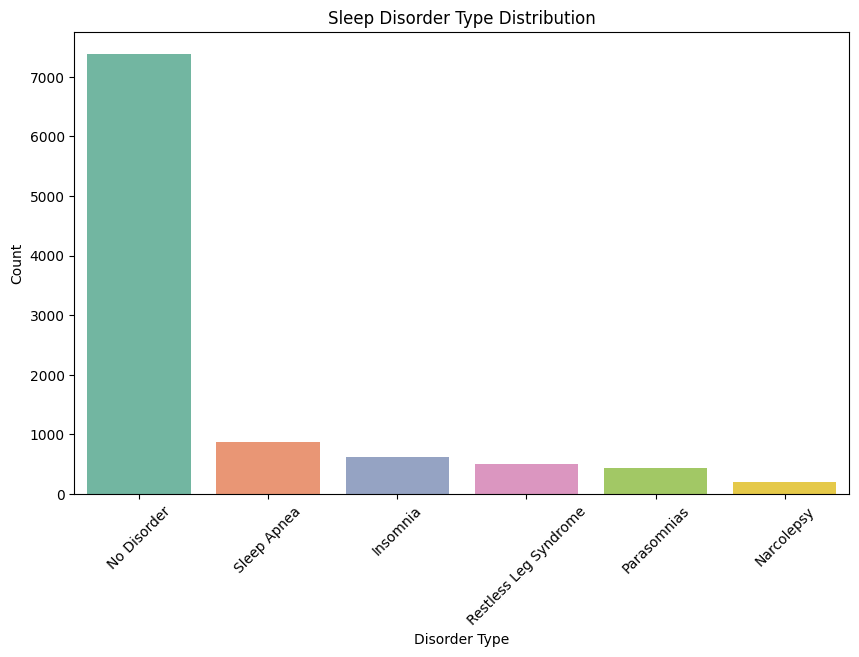

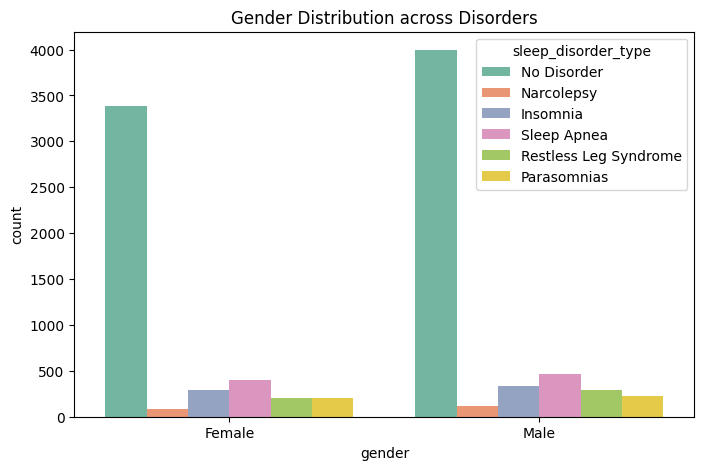

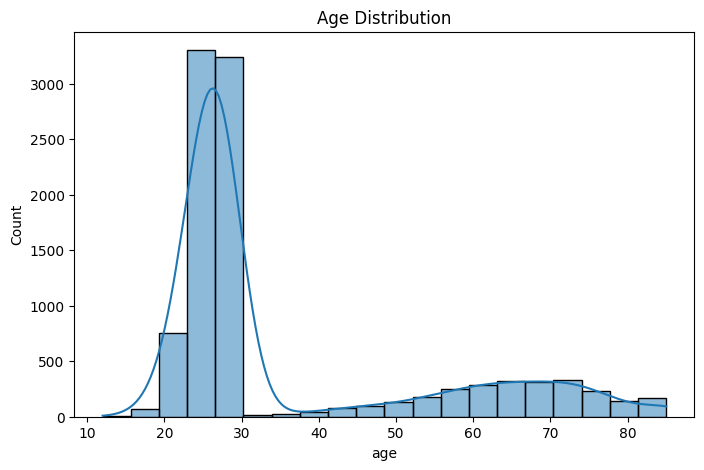

/tmp/ipython-input-172370517.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_disorder_type', y='sleep_duration', palette="Set1")


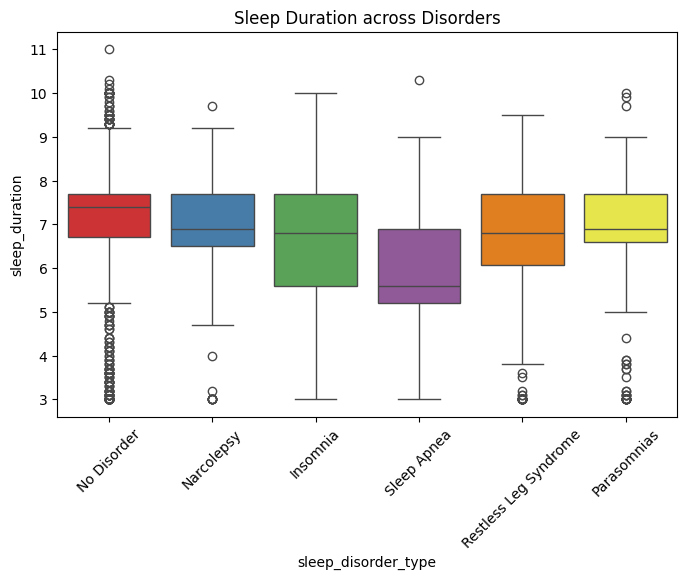

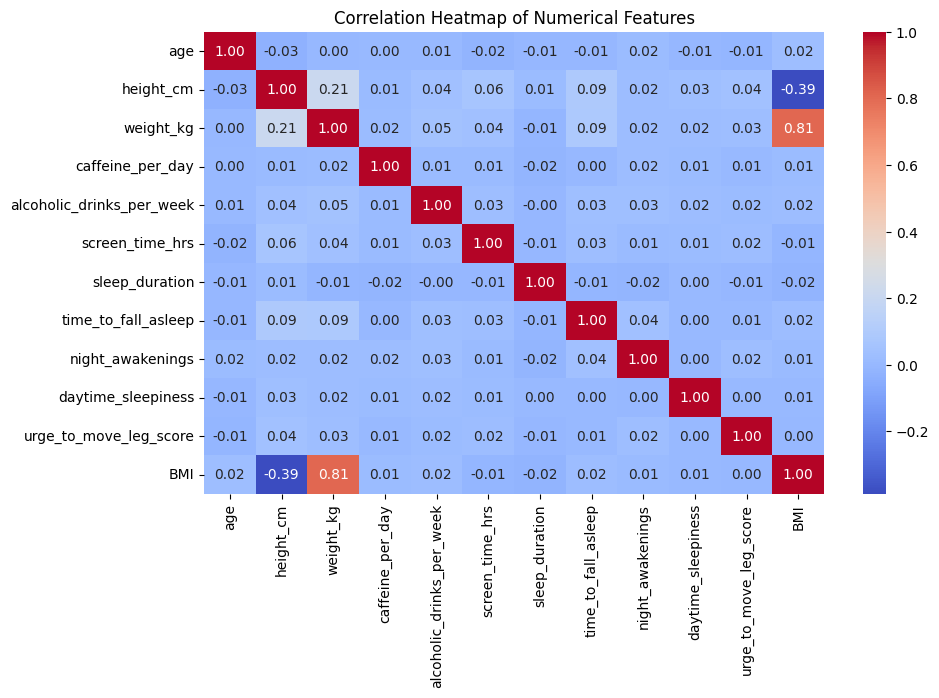

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="sleep_disorder_type", order=df["sleep_disorder_type"].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Sleep Disorder Type Distribution")
plt.xlabel("Disorder Type")
plt.ylabel("Count")
plt.show()


# Gender distribution by disorder
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='sleep_disorder_type', palette="Set2")
plt.title("Gender Distribution across Disorders")
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot of Sleep Duration vs Disorder
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sleep_disorder_type', y='sleep_duration', palette="Set1")
plt.title("Sleep Duration across Disorders")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap (for numeric features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

/tmp/ipython-input-1799668622.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_disorder_type', y='sleep_quality', hue=None, palette='Set3')


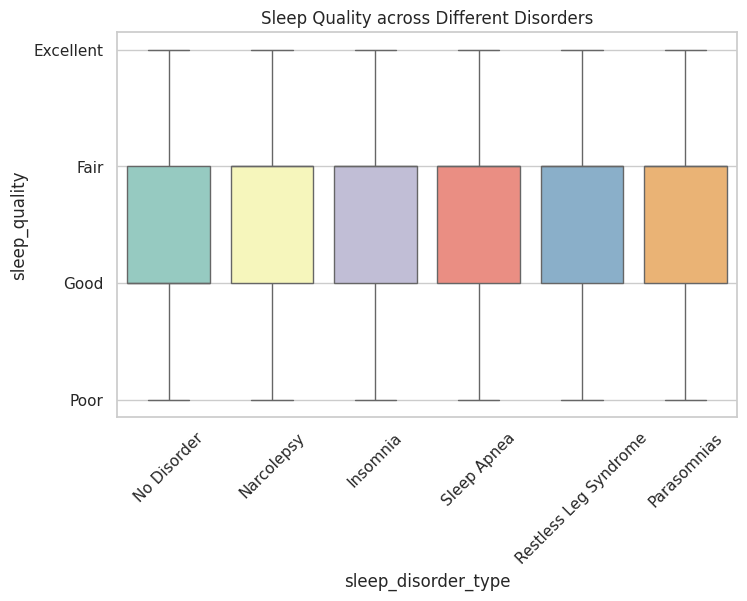

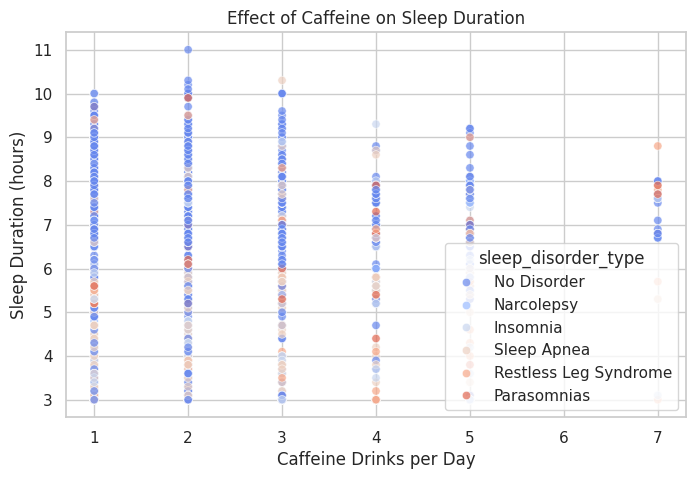

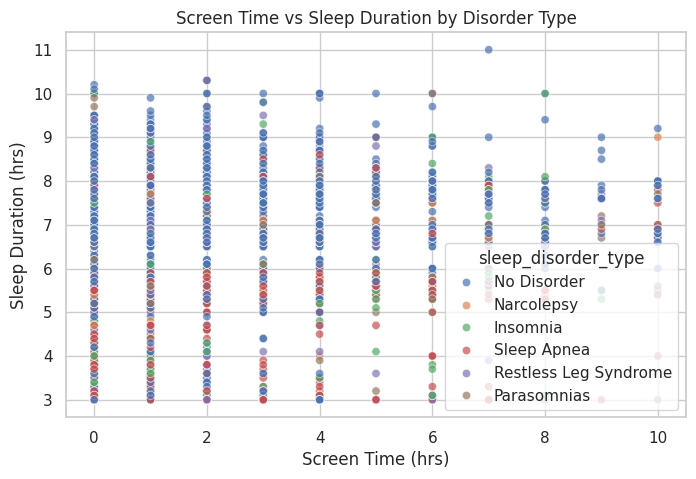

/tmp/ipython-input-1799668622.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_disorder_type', y='BMI', hue=None, palette='Set2')


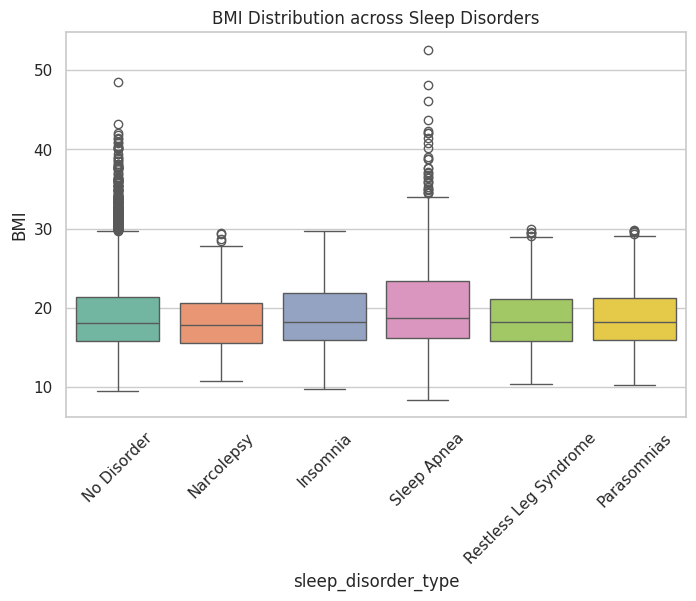

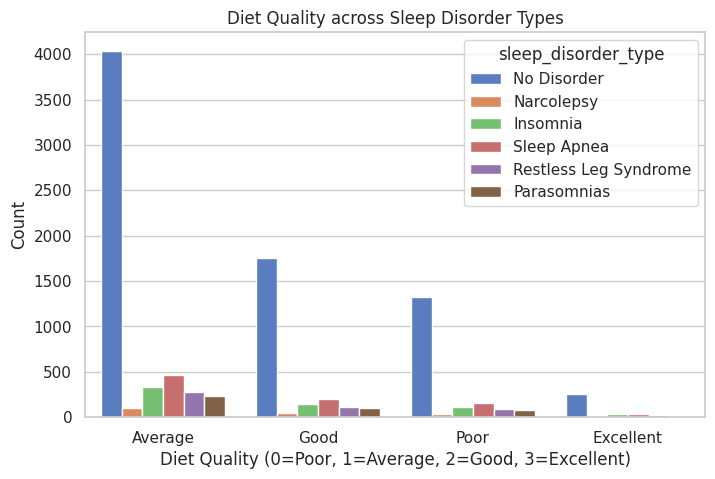

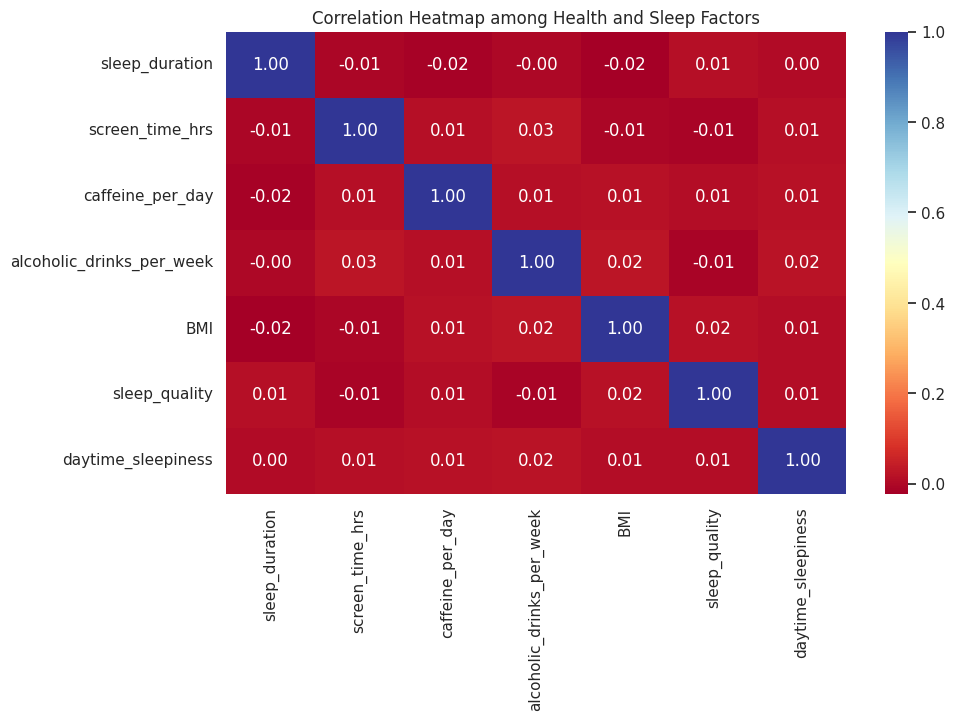

/tmp/ipython-input-1799668622.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sleep_disorder_type', y='sleep_duration', hue='gender',


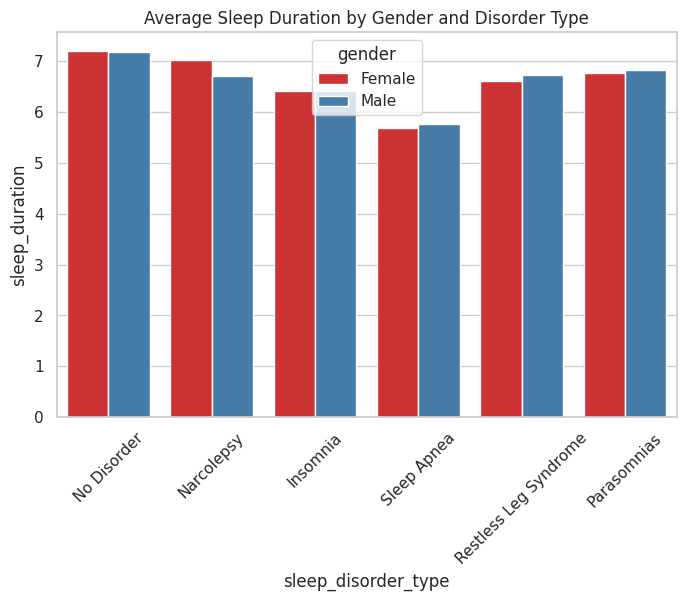

/tmp/ipython-input-1799668622.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_disorder_type', y='night_awakenings', hue=None, palette='Set3')


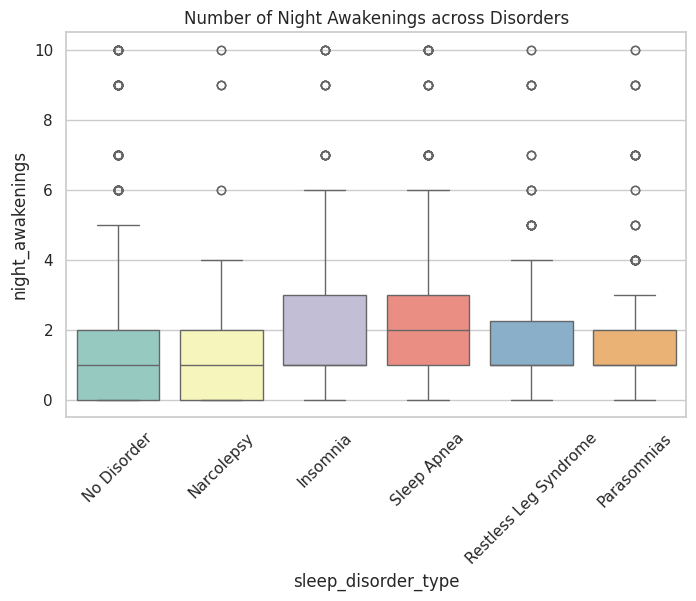

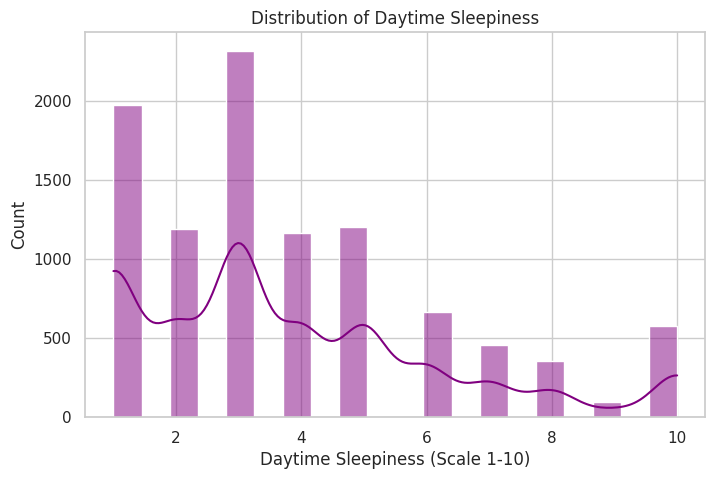

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")


#  Sleep Quality vs Disorder

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sleep_disorder_type', y='sleep_quality', hue=None, palette='Set3')
plt.title("Sleep Quality across Different Disorders")
plt.xticks(rotation=45)
plt.show()

#  Caffeine Intake vs Sleep Duration

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='caffeine_per_day', y='sleep_duration', hue='sleep_disorder_type',
                palette='coolwarm', alpha=0.7)
plt.title("Effect of Caffeine on Sleep Duration")
plt.xlabel("Caffeine Drinks per Day")
plt.ylabel("Sleep Duration (hours)")
plt.show()

#  Screen Time vs Sleep Duration

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='screen_time_hrs', y='sleep_duration', hue='sleep_disorder_type',
                alpha=0.7)
plt.title("Screen Time vs Sleep Duration by Disorder Type")
plt.xlabel("Screen Time (hrs)")
plt.ylabel("Sleep Duration (hrs)")
plt.show()


#  Relationship between BMI and Sleep Duration

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sleep_disorder_type', y='BMI', hue=None, palette='Set2')
plt.title("BMI Distribution across Sleep Disorders")
plt.xticks(rotation=45)
plt.show()

#  Diet Quality vs Sleep Disorder

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='diet_quality', hue='sleep_disorder_type', palette='muted')
plt.title("Diet Quality across Sleep Disorder Types")
plt.xlabel("Diet Quality (0=Poor, 1=Average, 2=Good, 3=Excellent)")
plt.ylabel("Count")
plt.show()

#  Correlation of Health Factors

# Convert categorical columns to numeric for correlation
df_corr = df.copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = df_corr[col].astype('category').cat.codes

corr_features = ['sleep_duration', 'screen_time_hrs', 'caffeine_per_day',
                 'alcoholic_drinks_per_week', 'BMI', 'sleep_quality', 'daytime_sleepiness']

plt.figure(figsize=(10,6))
sns.heatmap(df_corr[corr_features].corr(), annot=True, cmap='RdYlBu', fmt='.2f')
plt.title("Correlation Heatmap among Health and Sleep Factors")
plt.show()



# Average Sleep Duration by Gender and Disorder

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='sleep_disorder_type', y='sleep_duration', hue='gender',
            palette='Set1', ci=None)
plt.title("Average Sleep Duration by Gender and Disorder Type")
plt.xticks(rotation=45)
plt.show()

#  Night Awakenings Distribution

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sleep_disorder_type', y='night_awakenings', hue=None, palette='Set3')
plt.title("Number of Night Awakenings across Disorders")
plt.xticks(rotation=45)
plt.show()

#  Distribution of Daytime Sleepiness

plt.figure(figsize=(8,5))
sns.histplot(df['daytime_sleepiness'], bins=20, kde=True, color='purple')
plt.title("Distribution of Daytime Sleepiness")
plt.xlabel("Daytime Sleepiness (Scale 1-10)")
plt.ylabel("Count")
plt.show()


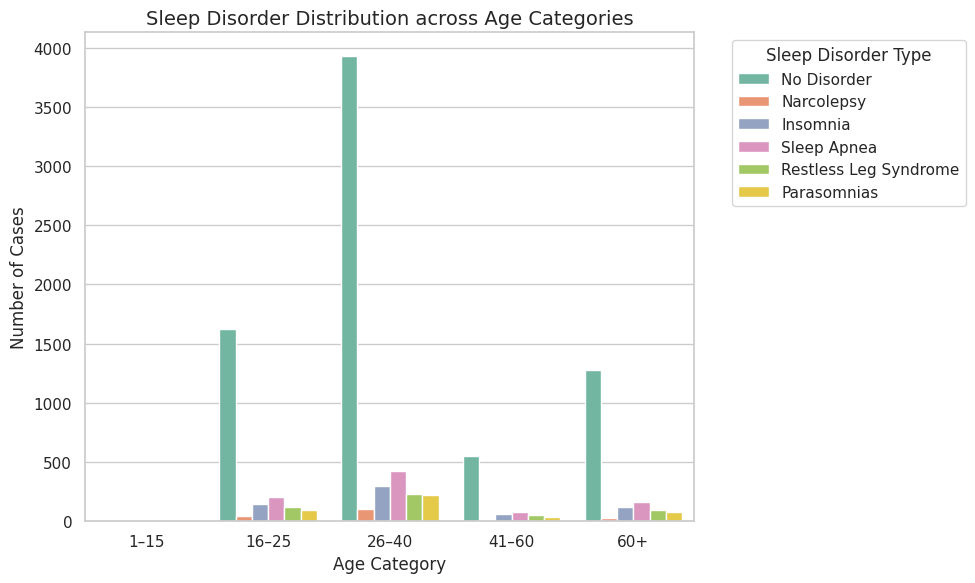

/tmp/ipython-input-2204825923.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disorder.groupby('age_category')['count']


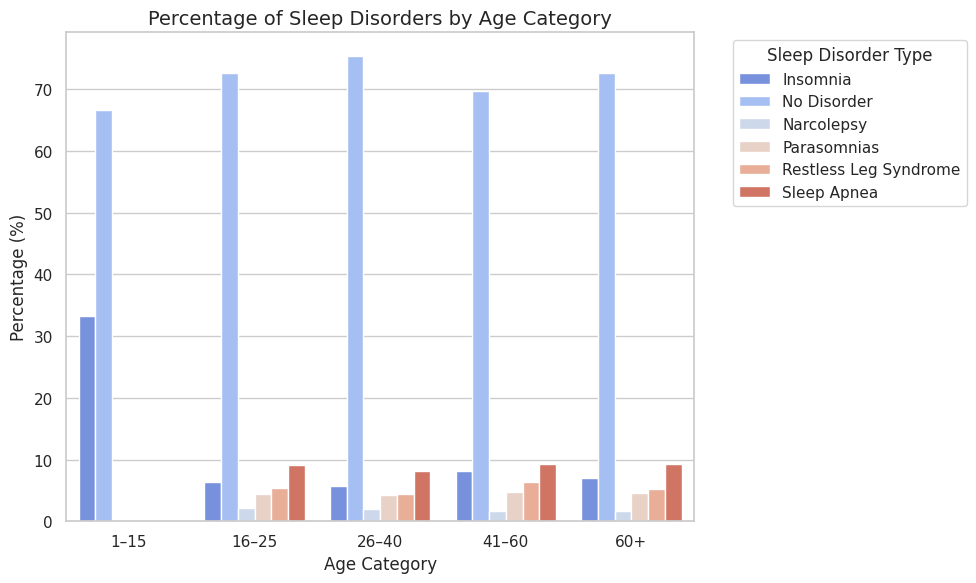

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Define age categories ---
bins = [0, 15, 25, 40, 60, 120]
labels = ['1–15', '16–25', '26–40', '41–60', '60+']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# --- Step 2: Raw count distribution ---
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age_category', hue='sleep_disorder_type', palette='Set2')
plt.title("Sleep Disorder Distribution across Age Categories", fontsize=14)
plt.xlabel("Age Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sleep Disorder Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Step 3: Percentage distribution ---
# Compute grouped count
age_disorder = (
    df.groupby(['age_category', 'sleep_disorder_type'], observed=True)
      .size()
      .reset_index(name='count')
)

# Compute percentage safely (avoid index mismatch)
age_disorder['percentage'] = (
    age_disorder.groupby('age_category')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# Plot percentage by age category
plt.figure(figsize=(10,6))
sns.barplot(data=age_disorder, x='age_category', y='percentage', hue='sleep_disorder_type', palette='coolwarm')
plt.title("Percentage of Sleep Disorders by Age Category", fontsize=14)
plt.xlabel("Age Category")
plt.ylabel("Percentage (%)")
plt.legend(title="Sleep Disorder Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load dataset
f = pd.read_csv("Sleep_Disorder_Dataset2.csv")

# Show column names
print("✅ Columns in the dataset:")
print(f.columns.tolist())

# Show data types of each column
print("\n✅ Data types of each column:")
print(f.dtypes)




✅ Columns in the dataset:
['age', 'gender', 'height_cm', 'weight_kg', 'caffeine_per_day', 'smoking_status', 'alcoholic_drinks_per_week', 'screen_time_hrs', 'diet_quality', 'sleep_duration', 'time_to_fall_asleep', 'night_awakenings', 'sleep_quality', 'daytime_sleepiness', 'urge_to_move_leg_score', 'daytime_sleep_attacks', 'irregular_work_patterns', 'unusual_behaviors', 'BMI', 'has_sleep_disorder', 'sleep_disorder_type']

✅ Data types of each column:
age                          float64
gender                        object
height_cm                    float64
weight_kg                    float64
caffeine_per_day             float64
smoking_status                object
alcoholic_drinks_per_week    float64
screen_time_hrs              float64
diet_quality                  object
sleep_duration               float64
time_to_fall_asleep          float64
night_awakenings             float64
sleep_quality                 object
daytime_sleepiness           float64
urge_to_move_leg_score       

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Sleep_Disorder_Dataset2.csv")

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"{col}:\n{df[col].unique()}\n")


gender:
['Female' 'Male']

smoking_status:
['No' 'Occasionally' 'Yes, regularly']

diet_quality:
['Average' 'Good' 'Poor' 'Excellent']

sleep_quality:
['Excellent' 'Fair' 'Good' 'Poor']

daytime_sleep_attacks:
['no' 'yes' 'No']

irregular_work_patterns:
['no' 'yes' 'No']

unusual_behaviors:
['no' 'yes' 'No']

has_sleep_disorder:
['No' 'Yes']

sleep_disorder_type:
['No Disorder' 'Narcolepsy' 'Insomnia' 'Sleep Apnea'
 'Restless Leg Syndrome' 'Parasomnias']



In [ ]:
binary_cols = ['daytime_sleep_attacks','irregular_work_patterns','unusual_behaviors']

for col in binary_cols:
    df[col] = df[col].str.lower().map({'no':0, 'yes':1})


In [ ]:
df['diet_quality'] = df['diet_quality'].map({'Poor':0, 'Average':1, 'Good':2, 'Excellent':3})
df['sleep_quality'] = df['sleep_quality'].map({'Poor':0, 'Fair':1, 'Good':2, 'Excellent':3})


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Female=0, Male=1


In [ ]:
df['has_sleep_disorder'] = le.fit_transform(df['has_sleep_disorder'])
df['sleep_disorder_type'] = le.fit_transform(df['sleep_disorder_type'])


In [ ]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [ ]:
 #Save encoded dataset
df.to_csv("Sleep_Disorder_Dataset2_encoded.csv", index=False)

# Show dataset shape
print("Encoded dataset shape:", df.shape)

Encoded dataset shape: (10000, 21)



RandomForest Stage 1 Accuracy: 0.9775
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1467
           1       1.00      0.92      0.96       533

    accuracy                           0.98      2000
   macro avg       0.98      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



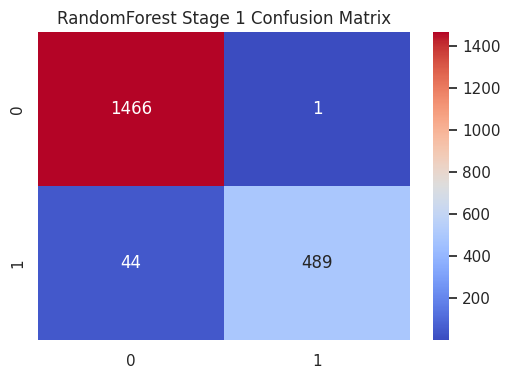


XGBoost Stage 1 Accuracy: 0.9930
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1467
           1       1.00      0.98      0.99       533

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



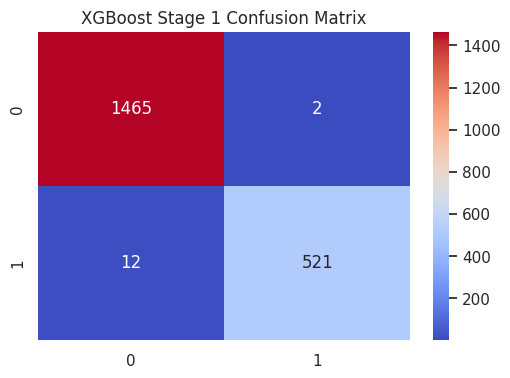


GradientBoosting Stage 1 Accuracy: 0.9810
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1467
           1       1.00      0.93      0.96       533

    accuracy                           0.98      2000
   macro avg       0.99      0.96      0.98      2000
weighted avg       0.98      0.98      0.98      2000



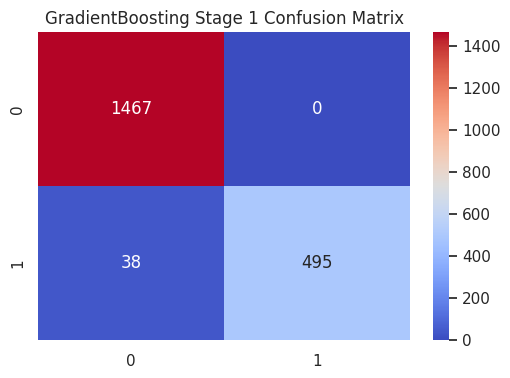


LogisticRegression Stage 1 Accuracy: 0.9035
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1467
           1       0.86      0.76      0.81       533

    accuracy                           0.90      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000



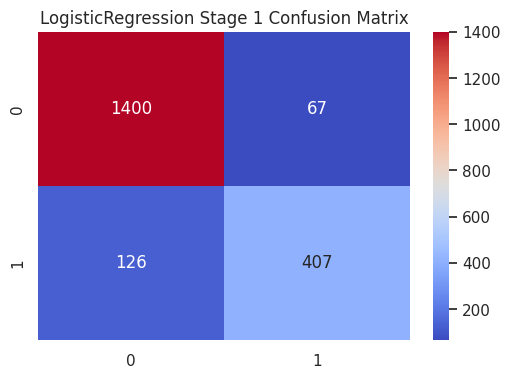


SVM Stage 1 Accuracy: 0.8870
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1467
           1       0.90      0.65      0.75       533

    accuracy                           0.89      2000
   macro avg       0.89      0.81      0.84      2000
weighted avg       0.89      0.89      0.88      2000



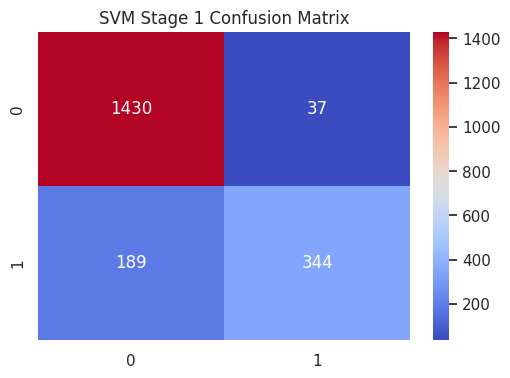


ML_Hybrid_RF_XGB Stage 1 Accuracy: 0.9930
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1467
           1       1.00      0.98      0.99       533

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



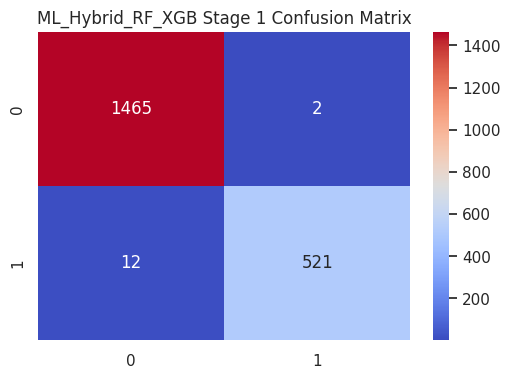

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

MLP Stage 1 Accuracy: 0.9610
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1467
           1       0.92      0.93      0.93       533

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



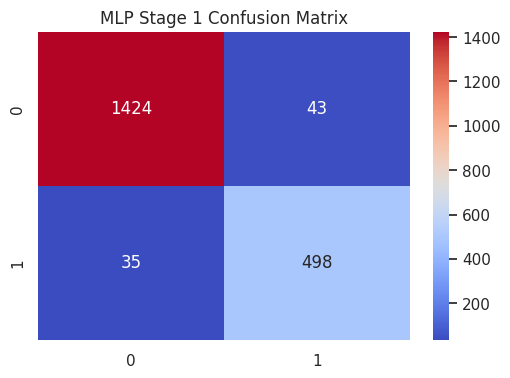


RandomForest Stage 2 Accuracy: 0.9535
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       123
           1       0.96      0.65      0.77        37
           2       0.95      1.00      0.98      1467
           3       0.95      0.94      0.95        85
           4       0.90      0.80      0.85        90
           5       0.99      0.81      0.89       198

    accuracy                           0.95      2000
   macro avg       0.95      0.84      0.89      2000
weighted avg       0.95      0.95      0.95      2000



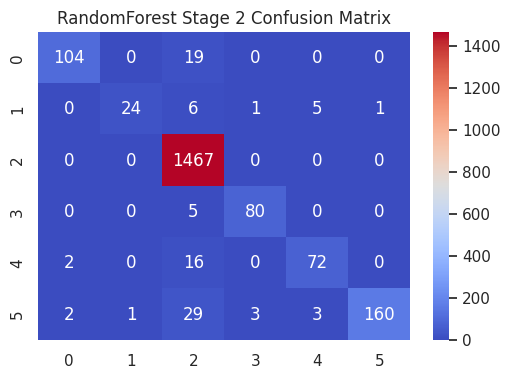


XGBoost Stage 2 Accuracy: 0.9860
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       123
           1       1.00      0.97      0.99        37
           2       0.98      1.00      0.99      1467
           3       1.00      0.95      0.98        85
           4       0.98      0.92      0.95        90
           5       1.00      0.96      0.98       198

    accuracy                           0.99      2000
   macro avg       0.99      0.96      0.97      2000
weighted avg       0.99      0.99      0.99      2000



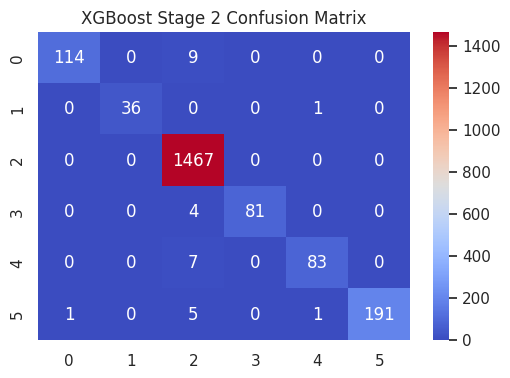


GradientBoosting Stage 2 Accuracy: 0.9825
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       123
           1       1.00      1.00      1.00        37
           2       0.98      1.00      0.99      1467
           3       1.00      0.96      0.98        85
           4       0.99      0.90      0.94        90
           5       0.99      0.96      0.98       198

    accuracy                           0.98      2000
   macro avg       0.99      0.95      0.97      2000
weighted avg       0.98      0.98      0.98      2000



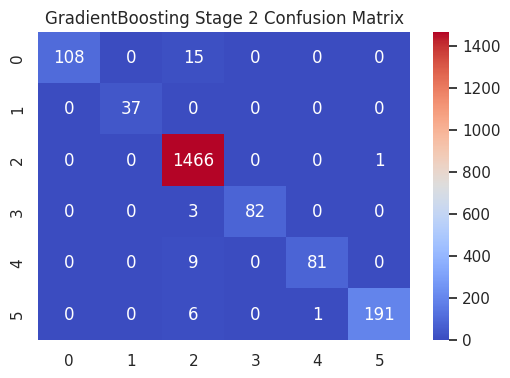


LogisticRegression Stage 2 Accuracy: 0.8410
              precision    recall  f1-score   support

           0       0.58      0.46      0.51       123
           1       0.40      0.11      0.17        37
           2       0.89      0.96      0.93      1467
           3       0.74      0.73      0.73        85
           4       0.61      0.61      0.61        90
           5       0.67      0.47      0.55       198

    accuracy                           0.84      2000
   macro avg       0.65      0.56      0.58      2000
weighted avg       0.82      0.84      0.83      2000



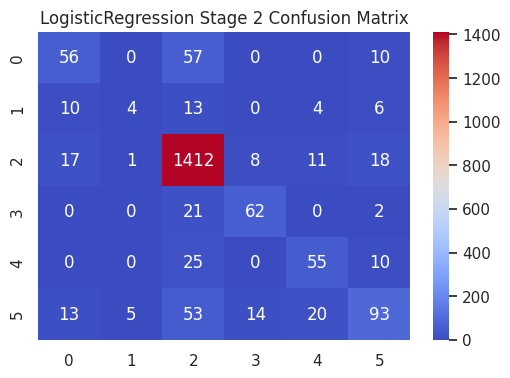


SVM Stage 2 Accuracy: 0.7805
              precision    recall  f1-score   support

           0       0.62      0.04      0.08       123
           1       0.00      0.00      0.00        37
           2       0.79      1.00      0.88      1467
           3       1.00      0.01      0.02        85
           4       0.59      0.22      0.32        90
           5       0.73      0.37      0.49       198

    accuracy                           0.78      2000
   macro avg       0.62      0.27      0.30      2000
weighted avg       0.76      0.78      0.71      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


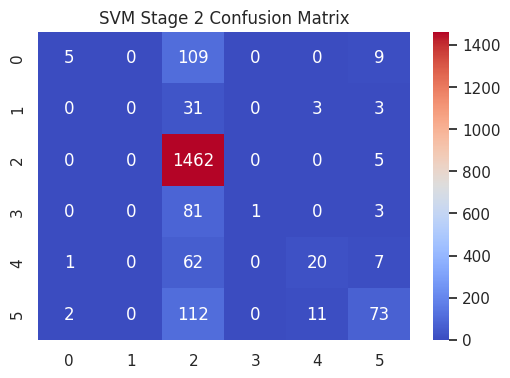


ML_Hybrid_RF_XGB Stage 2 Accuracy: 0.9905
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       123
           1       1.00      1.00      1.00        37
           2       0.99      1.00      0.99      1467
           3       1.00      0.98      0.99        85
           4       0.99      0.93      0.96        90
           5       1.00      0.97      0.99       198

    accuracy                           0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



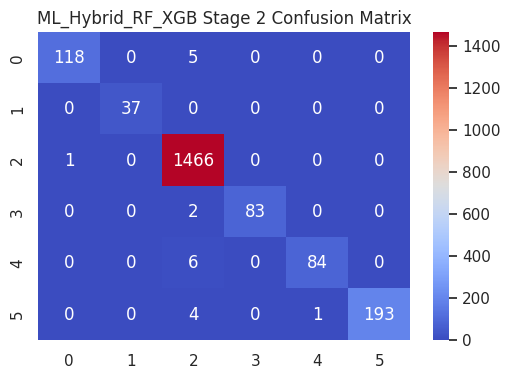

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

MLP Stage 2 Accuracy: 0.9355
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       123
           1       0.87      0.73      0.79        37
           2       0.96      0.98      0.97      1467
           3       0.89      0.91      0.90        85
           4       0.76      0.84      0.80        90
           5       0.93      0.83      0.88       198

    accuracy                           0.94      2000
   macro avg       0.88      0.84      0.86      2000
weighted avg       0.94      0.94      0.93      2000



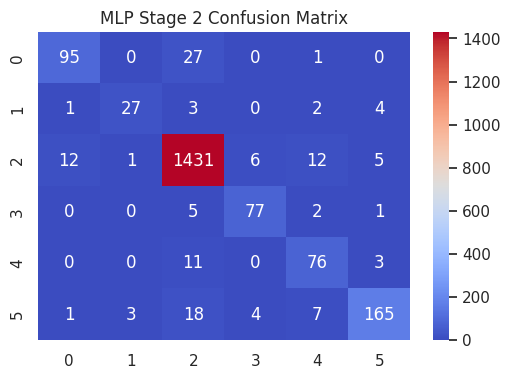


=== Summary with Overall Accuracy ===
                    Stage 1 Accuracy  Stage 2 Accuracy  Overall Accuracy
RandomForest                  0.9775            0.9535            0.9615
XGBoost                       0.9930            0.9860            0.9870
GradientBoosting              0.9810            0.9825            0.9820
LogisticRegression            0.9035            0.8410            0.8580
SVM                           0.8870            0.7805            0.7925
ML_Hybrid_RF_XGB              0.9930            0.9905            0.9920
MLP                           0.9610            0.9355            0.9405


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# ---------------- Load dataset ----------------
df = pd.read_csv("Sleep_Disorder_Dataset2_encoded.csv")

# Features & targets
X = df.drop(['has_sleep_disorder','sleep_disorder_type'], axis=1)
y_stage1 = df['has_sleep_disorder']         # Binary
y_stage2 = df['sleep_disorder_type']        # Multi-class

# Split datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_stage1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_stage2, test_size=0.2, random_state=42)

# Scale numeric features
numeric_cols = ['age','height_cm','weight_kg','caffeine_per_day','alcoholic_drinks_per_week',
                'screen_time_hrs','sleep_duration','time_to_fall_asleep','night_awakenings',
                'daytime_sleepiness','urge_to_move_leg_score']
scaler = StandardScaler()
X_train1[numeric_cols] = scaler.fit_transform(X_train1[numeric_cols])
X_test1[numeric_cols] = scaler.transform(X_test1[numeric_cols])
X_train2[numeric_cols] = scaler.fit_transform(X_train2[numeric_cols])
X_test2[numeric_cols] = scaler.transform(X_test2[numeric_cols])

# ---------------- Helper functions ----------------
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates model and plots confusion matrix"""
    y_pred = model.predict(X_test)

    # Handle Keras models
    if hasattr(model, "predict") and not hasattr(model, "fit_transform"):
        if y_pred.ndim == 2 and y_pred.shape[1] == 1:   # Binary
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
        elif y_pred.ndim == 2 and y_pred.shape[1] > 1:  # Multi-class
            y_pred_classes = y_pred.argmax(axis=1)
        else:
            y_pred_classes = y_pred
    else:
        y_pred_classes = y_pred

    acc = accuracy_score(y_test, y_pred_classes)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred_classes))
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    return y_pred_classes, acc

def calculate_overall_accuracy(stage1_pred, stage2_pred, y_test1, y_test2):
    """Compute overall accuracy combining Stage 1 and Stage 2 predictions"""
    final_pred = []
    final_true = []
    for s1_pred, s2_pred, s1_true, s2_true in zip(stage1_pred, stage2_pred, y_test1, y_test2):
        if s1_pred == 0:
            final_pred.append(0)
        else:
            final_pred.append(s2_pred)
        if s1_true == 0:
            final_true.append(0)
        else:
            final_true.append(s2_true)
    return accuracy_score(final_true, final_pred)

# ---------------- ML Models ----------------
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42))
]
ml_hybrid = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "ML_Hybrid_RF_XGB": ml_hybrid
}

# ---------------- Deep Learning MLP ----------------
def create_mlp(input_dim, output_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim, activation='softmax' if output_dim>1 else 'sigmoid'))
    model.compile(optimizer=Adam(0.001),
                  loss='sparse_categorical_crossentropy' if output_dim>1 else 'binary_crossentropy',
                  metrics=['accuracy'])
    return model


def create_autoencoder_mlp(input_dim, output_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(32, activation='relu')(input_layer)
    encoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='linear')(decoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    mlp_output = Dense(output_dim, activation='softmax' if output_dim>1 else 'sigmoid')(encoded)
    mlp_model = Model(inputs=input_layer, outputs=mlp_output)
    mlp_model.compile(optimizer=Adam(0.001),
                      loss='sparse_categorical_crossentropy' if output_dim>1 else 'binary_crossentropy',
                      metrics=['accuracy'])
    return autoencoder, mlp_model

# ---------------- Dictionaries to store accuracies ----------------
stage1_acc = {}
stage2_acc = {}
overall_acc = {}

# ---------------- Stage 1: Has Sleep Disorder (Binary) ----------------
stage1_preds = {}
stage2_preds = {}

for name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred_stage1, acc1 = evaluate_model(model, X_test1, y_test1, name + " Stage 1")
    stage1_acc[name] = acc1
    stage1_preds[name] = y_pred_stage1

# MLP Stage 1
mlp_stage1 = create_mlp(X_train1.shape[1], 1)
mlp_stage1.fit(X_train1, y_train1, epochs=50, batch_size=32, verbose=0)
y_pred_stage1, acc1 = evaluate_model(mlp_stage1, X_test1, y_test1, "MLP Stage 1")
stage1_acc["MLP"] = acc1
stage1_preds["MLP"] = y_pred_stage1


# ---------------- Stage 2: Type of Disorder (Multi-class) ----------------
num_classes_stage2 = len(y_stage2.unique())

for name, model in models.items():
    model.fit(X_train2, y_train2)
    y_pred_stage2, acc2 = evaluate_model(model, X_test2, y_test2, name + " Stage 2")
    stage2_acc[name] = acc2
    stage2_preds[name] = y_pred_stage2

# MLP Stage 2
mlp_stage2 = create_mlp(X_train2.shape[1], num_classes_stage2)
mlp_stage2.fit(X_train2, y_train2, epochs=50, batch_size=32, verbose=0)
y_pred_stage2, acc2 = evaluate_model(mlp_stage2, X_test2, y_test2, "MLP Stage 2")
stage2_acc["MLP"] = acc2
stage2_preds["MLP"] = y_pred_stage2



# ---------------- Calculate Overall Accuracy ----------------
for name in stage1_acc.keys():
    overall_acc[name] = calculate_overall_accuracy(stage1_preds[name], stage2_preds[name], y_test1.values, y_test2.values)

# ---------------- Summary DataFrame ----------------
accuracy_summary = pd.DataFrame({
    "Stage 1 Accuracy": stage1_acc,
    "Stage 2 Accuracy": stage2_acc,
    "Overall Accuracy": overall_acc
})

print("\n=== Summary with Overall Accuracy ===")
print(accuracy_summary)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

CNN Stage 1 Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1467
           1       0.94      0.92      0.93       533

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



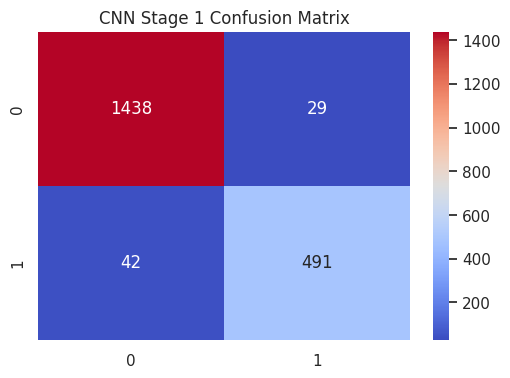

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

CNN Stage 2 Accuracy: 0.9205
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       123
           1       0.75      0.57      0.65        37
           2       0.94      0.97      0.96      1467
           3       0.84      0.93      0.88        85
           4       0.74      0.73      0.74        90
           5       0.94      0.75      0.83       198

    accuracy                           0.92      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.92      0.92      0.92      2000



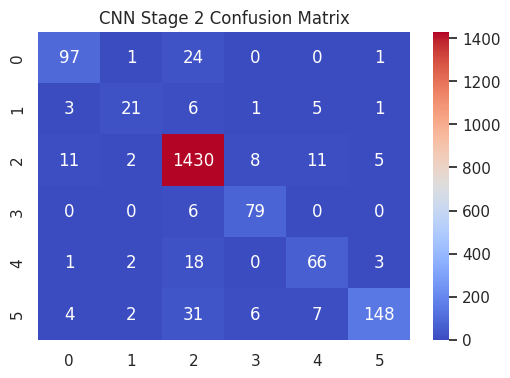


=== Summary with Overall Accuracy ===
                Model  Stage 1 Accuracy  Stage 2 Accuracy  Overall Accuracy
0        RandomForest            0.9775            0.9535            0.9615
1             XGBoost            0.9930            0.9860            0.9870
2    GradientBoosting            0.9810            0.9825            0.9820
3  LogisticRegression            0.9035            0.8410            0.8580
4                 SVM            0.8870            0.7805            0.7925
5    ML_Hybrid_RF_XGB            0.9930            0.9905            0.9920
6                 MLP            0.9610            0.9355            0.9405
7                 CNN            0.9645            0.9205            0.9280
8                DNDF            0.8225            0.7675            0.7695
9            CNN-DNDF            0.8565            0.7975            0.7875


In [ ]:
# ==========================================================
# ----------- Deep Learning + Hybrid Architectures ----------
# ==========================================================

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# --- CNN ---
def create_cnn(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim, 1)),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(output_dim, activation='softmax' if output_dim > 1 else 'sigmoid')
    ])
    model.compile(
        optimizer=Adam(0.001),
        loss='sparse_categorical_crossentropy' if output_dim > 1 else 'binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# --- DNDF-like (Deep Neural Decision Forest Approximation) ---
def train_dndf_like(X_train, y_train, X_test, y_test):
    """
    Simulates DNDF: small neural net for feature extraction + RandomForest classifier.
    """
    feature_extractor = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu')
    ])
    feature_extractor.compile(optimizer='adam', loss='mse')

    # Extract deep features
    features_train = feature_extractor.predict(X_train, verbose=0)
    features_test = feature_extractor.predict(X_test, verbose=0)

    # Tree-based layer
    forest = RandomForestClassifier(n_estimators=200, random_state=42)
    forest.fit(features_train, y_train)
    y_pred = forest.predict(features_test)
    acc = accuracy_score(y_test, y_pred)
    return y_pred, acc


# --- CNN + DNDF Hybrid ---
def train_cnn_dndf_hybrid(X_train, y_train, X_test, y_test):
    """
    CNN for feature extraction + GradientBoosting decision layer.
    """
    X_train_cnn = X_train.values.reshape(-1, X_train.shape[1], 1)
    X_test_cnn = X_test.values.reshape(-1, X_test.shape[1], 1)

    cnn = Sequential([
        Input(shape=(X_train.shape[1], 1)),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu')
    ])
    cnn.compile(optimizer='adam', loss='mse')

    # Extract CNN features
    features_train = cnn.predict(X_train_cnn, verbose=0)
    features_test = cnn.predict(X_test_cnn, verbose=0)

    # Tree-based layer
    forest = GradientBoostingClassifier(n_estimators=200, random_state=42)
    forest.fit(features_train, y_train)
    y_pred = forest.predict(features_test)
    acc = accuracy_score(y_test, y_pred)
    return y_pred, acc


# ==========================================================
# -------- Stage 1: Binary Classification ------------------
# ==========================================================

# --- CNN ---
cnn_stage1 = create_cnn(X_train1.shape[1], 1)
X_train_cnn = X_train1.values.reshape(-1, X_train1.shape[1], 1)
X_test_cnn = X_test1.values.reshape(-1, X_test1.shape[1], 1)
cnn_stage1.fit(X_train_cnn, y_train1, epochs=30, batch_size=32, verbose=0)
y_pred_cnn1, acc_cnn1 = evaluate_model(cnn_stage1, X_test_cnn, y_test1, "CNN Stage 1")
stage1_acc["CNN"] = acc_cnn1
stage1_preds["CNN"] = y_pred_cnn1

# --- DNDF ---
y_pred_dndf1, acc_dndf1 = train_dndf_like(X_train1, y_train1, X_test1, y_test1)
stage1_acc["DNDF"] = acc_dndf1
stage1_preds["DNDF"] = y_pred_dndf1

# --- CNN-DNDF Hybrid ---
y_pred_hybrid1, acc_hybrid1 = train_cnn_dndf_hybrid(X_train1, y_train1, X_test1, y_test1)
stage1_acc["CNN-DNDF"] = acc_hybrid1
stage1_preds["CNN-DNDF"] = y_pred_hybrid1


# ==========================================================
# -------- Stage 2: Multi-Class Classification --------------
# ==========================================================

# --- CNN ---
cnn_stage2 = create_cnn(X_train2.shape[1], num_classes_stage2)
X_train_cnn2 = X_train2.values.reshape(-1, X_train2.shape[1], 1)
X_test_cnn2 = X_test2.values.reshape(-1, X_test2.shape[1], 1)
cnn_stage2.fit(X_train_cnn2, y_train2, epochs=30, batch_size=32, verbose=0)
y_pred_cnn2, acc_cnn2 = evaluate_model(cnn_stage2, X_test_cnn2, y_test2, "CNN Stage 2")
stage2_acc["CNN"] = acc_cnn2
stage2_preds["CNN"] = y_pred_cnn2

# --- DNDF ---
y_pred_dndf2, acc_dndf2 = train_dndf_like(X_train2, y_train2, X_test2, y_test2)
stage2_acc["DNDF"] = acc_dndf2
stage2_preds["DNDF"] = y_pred_dndf2

# --- CNN-DNDF Hybrid ---
y_pred_hybrid2, acc_hybrid2 = train_cnn_dndf_hybrid(X_train2, y_train2, X_test2, y_test2)
stage2_acc["CNN-DNDF"] = acc_hybrid2
stage2_preds["CNN-DNDF"] = y_pred_hybrid2


# ==========================================================
# -------- Compute Overall Accuracy -------------------------
# ==========================================================

summary_data = []
for model_name in stage1_preds.keys():
    if model_name in stage2_preds:
        overall = calculate_overall_accuracy(stage1_preds[model_name], stage2_preds[model_name], y_test1, y_test2)
        summary_data.append([model_name, stage1_acc[model_name], stage2_acc[model_name], overall])
    else:
        summary_data.append([model_name, stage1_acc[model_name], None, None])

summary_df = pd.DataFrame(summary_data, columns=['Model', 'Stage 1 Accuracy', 'Stage 2 Accuracy', 'Overall Accuracy'])
print("\n=== Summary with Overall Accuracy ===")
print(summary_df)


In [ ]:
# ---------------- Calculate Overall Accuracy ----------------
for name in stage1_acc.keys():
    overall_acc[name] = calculate_overall_accuracy(stage1_preds[name], stage2_preds[name], y_test1.values, y_test2.values)

# ---------------- Summary DataFrame ----------------
accuracy_summary = pd.DataFrame({
    "Stage 1 Accuracy": stage1_acc,
    "Stage 2 Accuracy": stage2_acc,
    "Overall Accuracy": overall_acc
})

print("\n=== Summary with Overall Accuracy ===")
print(accuracy_summary)


=== Summary with Overall Accuracy ===
                    Stage 1 Accuracy  Stage 2 Accuracy  Overall Accuracy
RandomForest                  0.9775            0.9535            0.9615
XGBoost                       0.9930            0.9860            0.9870
GradientBoosting              0.9810            0.9825            0.9820
LogisticRegression            0.9035            0.8410            0.8580
SVM                           0.8870            0.7805            0.7925
ML_Hybrid_RF_XGB              0.9930            0.9905            0.9920
MLP                           0.9610            0.9355            0.9405
CNN                           0.9645            0.9205            0.9280
DNDF                          0.8225            0.7675            0.7695
CNN-DNDF                      0.8565            0.7975            0.7875


In [ ]:
import time

# Start timer
start_time = time.time()

# ---------------- Your entire model training and evaluation code ----------------
# (Place all the code you shared here)

# End timer
end_time = time.time()

# Calculate total execution time in seconds
execution_time = end_time - start_time
print(f"\nTotal Execution Time: {execution_time:.2f} seconds")



Total Execution Time: 0.00 seconds


/tmp/ipython-input-283544533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_summary.index, y="Overall Accuracy", data=accuracy_summary, palette="viridis")


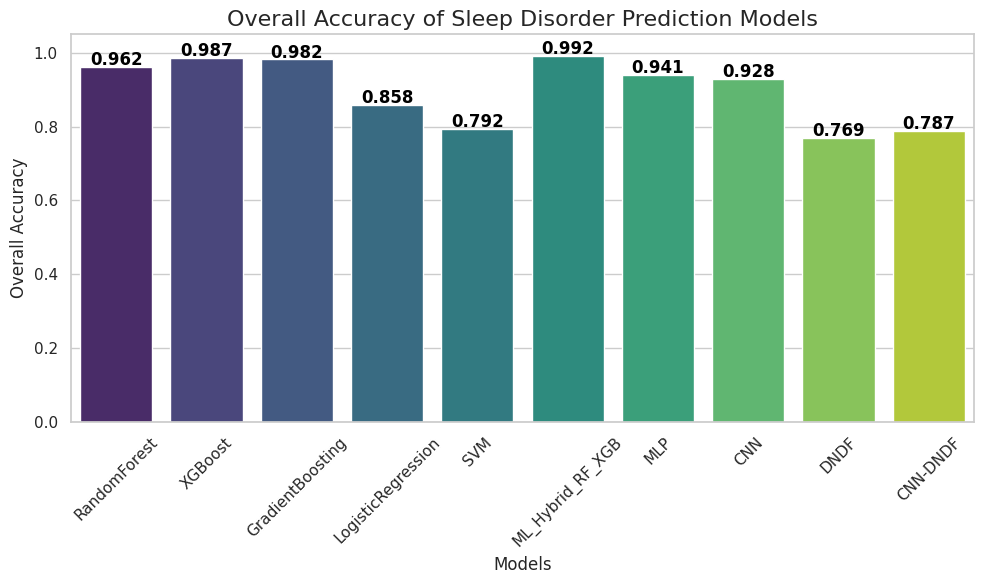

In [ ]:
# ---------------- Bar Chart for Overall Accuracy ----------------
plt.figure(figsize=(10,6))
sns.barplot(x=accuracy_summary.index, y="Overall Accuracy", data=accuracy_summary, palette="viridis")

# Add accuracy numbers inside the bars
for index, row in accuracy_summary.iterrows():
    plt.text(index, row["Overall Accuracy"] + 0.005, f'{row["Overall Accuracy"]:.3f}',
             color='black', ha="center", fontweight='bold')

plt.ylim(0, 1.05)
plt.title("Overall Accuracy of Sleep Disorder Prediction Models", fontsize=16)
plt.ylabel("Overall Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Stage 1
scaler_stage1 = StandardScaler()
X_train1_scaled = X_train1.copy()
X_train1_scaled[numeric_cols] = scaler_stage1.fit_transform(X_train1[numeric_cols])
joblib.dump(scaler_stage1, 'scaler_stage1.pkl')

# Stage 2
scaler_stage2 = StandardScaler()
X_train2_scaled = X_train2.copy()
X_train2_scaled[numeric_cols] = scaler_stage2.fit_transform(X_train2[numeric_cols])
joblib.dump(scaler_stage2, 'scaler_stage2.pkl')


['scaler_stage2.pkl']

In [ ]:
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Stage 1: Has Sleep Disorder
best_model_stage1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model_stage1.fit(X_train1, y_train1)

# Train and Test Accuracy
y_train_pred1 = best_model_stage1.predict(X_train1)
y_test_pred1 = best_model_stage1.predict(X_test1)

train_acc1 = accuracy_score(y_train1, y_train_pred1)
test_acc1 = accuracy_score(y_test1, y_test_pred1)
print("Stage 1 - Train Accuracy:", train_acc1)
print("Stage 1 - Test Accuracy:", test_acc1)

# Confusion matrix
cm1 = confusion_matrix(y_test1, y_test_pred1)
print("Stage 1 Confusion Matrix:\n", cm1)

# Save Stage 1 model
joblib.dump(best_model_stage1, 'best_model_stage1_sleep_disorder.pkl')


Stage 1 - Train Accuracy: 1.0
Stage 1 - Test Accuracy: 0.993
Stage 1 Confusion Matrix:
 [[1465    2]
 [  12  521]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:34:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['best_model_stage1_sleep_disorder.pkl']

In [ ]:
# Stage 2: Type of Disorder
best_model_stage2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
best_model_stage2.fit(X_train2, y_train2)

# Train and Test Accuracy
y_train_pred2 = best_model_stage2.predict(X_train2)
y_test_pred2 = best_model_stage2.predict(X_test2)

train_acc2 = accuracy_score(y_train2, y_train_pred2)
test_acc2 = accuracy_score(y_test2, y_test_pred2)
print("Stage 2 - Train Accuracy:", train_acc2)
print("Stage 2 - Test Accuracy:", test_acc2)

# Confusion matrix
cm2 = confusion_matrix(y_test2, y_test_pred2)
print("Stage 2 Confusion Matrix:\n", cm2)

# Save Stage 2 model
joblib.dump(best_model_stage2, 'best_model_stage2_disorder_type.pkl')


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:34:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stage 2 - Train Accuracy: 1.0
Stage 2 - Test Accuracy: 0.986
Stage 2 Confusion Matrix:
 [[ 114    0    9    0    0    0]
 [   0   36    0    0    1    0]
 [   0    0 1467    0    0    0]
 [   0    0    4   81    0    0]
 [   0    0    7    0   83    0]
 [   1    0    5    0    1  191]]


['best_model_stage2_disorder_type.pkl']

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load saved models and scalers
model_stage1 = joblib.load("best_model_stage1_sleep_disorder.pkl")
model_stage2 = joblib.load("best_model_stage2_disorder_type.pkl")
scaler_stage1 = joblib.load("scaler_stage1.pkl")
scaler_stage2 = joblib.load("scaler_stage2.pkl")

# Define numeric columns (same as in training)
numeric_cols = [
    'age', 'height_cm', 'weight_kg', 'caffeine_per_day',
    'alcoholic_drinks_per_week', 'screen_time_hrs',
    'sleep_duration', 'time_to_fall_asleep', 'night_awakenings',
    'daytime_sleepiness', 'urge_to_move_leg_score'
]

# Define all input columns in correct order (same as X used for training)
feature_columns = [
    'age', 'gender', 'height_cm', 'weight_kg', 'caffeine_per_day',
    'smoking_status', 'alcoholic_drinks_per_week', 'screen_time_hrs',
    'diet_quality', 'sleep_duration', 'time_to_fall_asleep', 'night_awakenings',
    'sleep_quality', 'daytime_sleepiness', 'urge_to_move_leg_score',
    'daytime_sleep_attacks', 'irregular_work_patterns', 'unusual_behaviors', 'BMI'
]

# Disorder label map
disorder_label_map = {
    0: 'Insomnia',
    1: 'Narcolepsy',
    2: 'No Disorder',
    3: 'Parasomnias',
    4: 'Restless Leg Syndrome',
    5: 'Sleep Apnea'
}

# --- Recommendation generation function ---
def generate_recommendations(row):
    recs = []

    # --- General sleep hygiene ---
    if row['sleep_duration'] < 7:
        recs.append("Try to get at least 7–8 hours of sleep per night for better recovery.")
    if row['screen_time_hrs'] > 4:
        recs.append("Reduce screen exposure at least 1 hour before bedtime to improve melatonin release.")
    if row['caffeine_per_day'] > 3:
        recs.append("Limit caffeine intake to before 2 PM to avoid interference with sleep.")
    if row['alcoholic_drinks_per_week'] > 3:
        recs.append("Avoid alcohol close to bedtime—it can reduce REM sleep quality.")
    if isinstance(row['diet_quality'], (int, float)) and row['diet_quality'] <= 1:
        recs.append("Improve diet quality with more fruits, vegetables, and balanced meals.")
    if row['daytime_sleepiness'] > 6:
        recs.append("Consider short naps (<30 mins) and a consistent bedtime routine.")

    # --- Disorder-specific recommendations ---
    disorder = row.get('sleep_disorder_type', 'Unknown')

    if disorder == 'Insomnia':
        recs.append("Maintain a regular sleep schedule and avoid caffeine after noon.")
        recs.append("Try relaxation techniques such as meditation or deep breathing before bed.")

    elif disorder == 'Sleep Apnea':
        recs.append("Consider a medical check-up for possible sleep apnea diagnosis.")
        recs.append("Maintain a healthy weight and avoid sleeping on your back.")
        recs.append("Avoid alcohol or sedatives before sleep.")

    elif disorder == 'Restless Leg Syndrome':
        recs.append("Engage in light stretching before bed and avoid caffeine or nicotine.")
        recs.append("Ensure adequate iron and magnesium intake.")

    elif disorder == 'Narcolepsy':
        recs.append("Schedule short, planned naps throughout the day.")
        recs.append("Consult a sleep specialist for treatment options and medication guidance.")

    elif disorder == 'Parasomnias':
        recs.append("Ensure a safe sleep environment (no sharp objects nearby).")
        recs.append("Avoid stress, alcohol, and sleep deprivation as triggers.")

    else:
        recs.append("Maintain good sleep hygiene and monitor for changes in sleep quality.")

    return recs


# --- Function to get user input ---
def get_user_input():
    print("Enter the following details:")
    data = {
        'age': float(input("Age: ")),
        'gender': int(input("Gender (Female=0, Male=1): ")),
        'height_cm': float(input("Height (in cm): ")),
        'weight_kg': float(input("Weight (in kg): ")),
        'caffeine_per_day': float(input("Caffeine drinks per day: ")),
        'smoking_status': int(input("Smoking Status (No=0, Yes=1): ")),
        'alcoholic_drinks_per_week': float(input("Alcoholic drinks per week: ")),
        'screen_time_hrs': float(input("Screen time (in hours): ")),
        'diet_quality': int(input("Diet Quality (Poor=0, Average=1, Good=2, Excellent=3): ")),
        'sleep_duration': float(input("Sleep duration (in hours): ")),
        'time_to_fall_asleep': float(input("Time to fall asleep (in minutes): ")),
        'night_awakenings': int(input("Number of night awakenings: ")),
        'sleep_quality': int(input("Sleep Quality (Poor=0, Fair=1, Good=2, Excellent=3): ")),
        'daytime_sleepiness': float(input("Daytime sleepiness (1-10): ")),
        'urge_to_move_leg_score': float(input("Urge to move legs before sleep (1-10): ")),
        'daytime_sleep_attacks': int(input("Daytime sleep attacks (No=0, Yes=1): ")),
        'irregular_work_patterns': int(input("Irregular work patterns (No=0, Yes=1): ")),
        'unusual_behaviors': int(input("Unusual sleep behaviors (No=0, Yes=1): "))
    }
    data['BMI'] = data['weight_kg'] / ((data['height_cm'] / 100) ** 2)
    return pd.DataFrame([data])


# --- Collect input ---
user_df = get_user_input()

# --- Scale numeric features ---
user_scaled_stage1 = user_df.copy()
user_scaled_stage1[numeric_cols] = scaler_stage1.transform(user_df[numeric_cols])
user_scaled_stage2 = user_df.copy()
user_scaled_stage2[numeric_cols] = scaler_stage2.transform(user_df[numeric_cols])

# --- Stage 1 prediction ---
stage1_pred = model_stage1.predict(user_scaled_stage1)[0]

if stage1_pred == 0:
    print("\n Prediction: No Sleep Disorder Detected.")
    disorder_name = 'No Disorder'
else:
    print("\n Prediction: Sleep Disorder Detected.")
    stage2_pred = model_stage2.predict(user_scaled_stage2)[0]
    disorder_name = disorder_label_map.get(stage2_pred, "Unknown Disorder")

print(f" Predicted Disorder Type: {disorder_name}")

# --- Generate dynamic recommendations ---
user_row = user_df.iloc[0].to_dict()
user_row['sleep_disorder_type'] = disorder_name
recs = generate_recommendations(user_row)

# --- Display final recommendations ---
print("\n Personalized Recommendations:")
for i, r in enumerate(recs, start=1):
    print(f"{i}. {r}")


Enter the following details:


In [ ]:
df.to_csv("Sleep_Disorder_Dataset_with_Recommendations.csv", index=False)
print(" Dataset saved with personalized recommendations!")
